1. We will start coding an Agent from scratch

2. It is based on blog post by Simon Wilson

3. https://til.simonwillison.net/llms/python-react-pattern

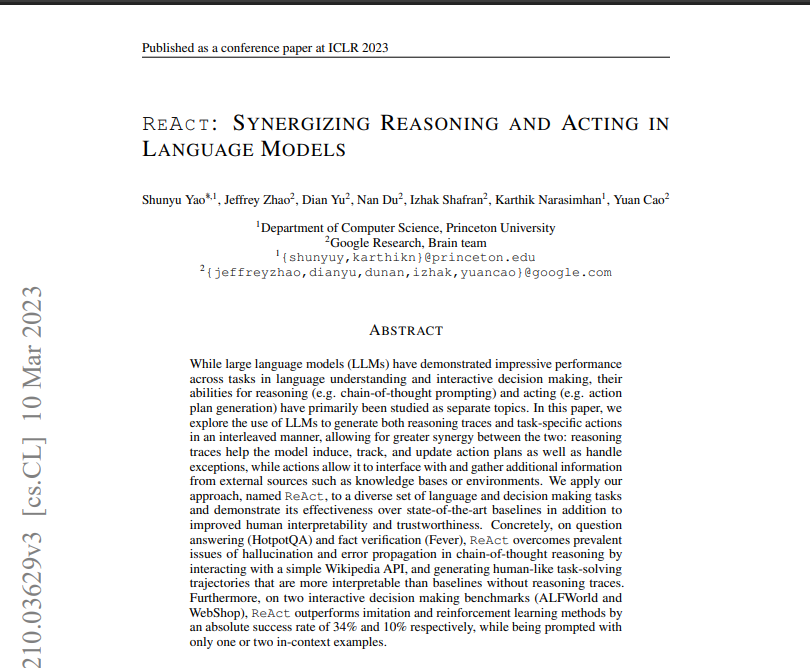

4. To get started we import everything needed

5. We then initialise the Language Model

6. We use OpenAI

7. Lets check its working

8. Create a class

9. Pass a system message

10. You need keep track of the list of messages over time

11. Append everything that happend in the ReAct loop

12. Append the system message in the list of messages

13. Agent can now be initialised

14. What do we want the Agent to do?

15. We implement the call emthod for the Agent

16. What do want the call method is: take the message that comes in and then append the message to the existing array of messages, coming from assistant

17. We then execute a function that we next implement - the execute method

18. In the execute method, we call the OpenAI Client

19. USe GPT-4, set the temperature =0

20. We return the mthod/string, the message that we get back from the model

21. This is the Agent

22. NExt we create the ReAct Agent

23. We have the prompt - very specific system message

24. We ask it to go through: Thought, Action and Pause

25. We give a one shot example

26. The Agent uses "Thought" to describe the action that is asked

27. IT will use Action to run one of the actions available to it.

28. It will then return Pause

29. It will use Observation to signal the results of running those Actions.

30.  We then tell it what the avaialble actions are.

31. We will implement the actions (Tools)

32. We also provide an example which is important for Language Model to understand how exactly it will be doing things.

33. In the eample we can seeL Question | Thought | Action | Pause | GEt back an observation | answe

34. We put thee tools: average_dog_weight, calculate

35. Add dictioanry

36. Functions are toy examples

37. Initialise the Agent

38. Call it once

39. How much does the toy poodle weight?

40. We look at the result

41. There is: Thought, Actiona dn Pause

42. Thought: I should look at the average dog weight

43. Action (tool to call): average_dog_Weight

44. Pause

45. During the Pause we should look up the average dog weight

46. Lets do that

47. We call the functon

48. We get string

49. We call the Agent with appended

50. We get the final anseer

51. Final answer is: The average dog weight is 7 ls.

52. We can see what's going on under the hood

53. Take a look at the message attribute of the Agent

54. We see that we first have the system message

55. The system emssage was the long prompt

56. We then have the first question: How much does the toy puddle weigh?

57. We then have the repsonse from the LAnguage model that vtells us to take the Action

58. We then have the user message eprsenting the observation

59. And then we have the final resposne

60. We try now with a different example

61. To do that, we reinitalize the Agent

62. This will clear all the messages that have accumulated

63. We will ask it a more complicated question this time

64. We ask: "I have 2 dogs, a border collie and scottish terrier. What si the combined weight?

65. We can see its first thought, it has a really good plan

66. It knows it has to find first the average weight of each breed

67. And then add those together to get total weight

68. Furt action is to call avg dog weight with: Border Collie

69. We execute the Action

70. We create the next prompt

71. We get a response to take a diff action

72. Call avg dog weight with scottish terrier

73. It asks to take the action with calculate

74. We take the action. Run it

75. We get back another prompt

76. We pass again to the Agent

77. Doing that we get back the final anser

78. We finish

79. The above process was truly manual

80. To Automate it, we put it in a  loop

81. Create regex for looking for Action string

82. This will tell us if we have to take an action or is it a final response.

83. We next create the query function

84. We do the same thing but ina  loop

85. We add the amx_turns parameter to take control how long it runs

86. HAve a counter to keep a track of the iterations we have done

87. Initialise the Agent with efaukt system prompt

88. Add logic

89. Keep the enxt_prompt variable to keep track of what's being passed to Agent

90. We get observation by calling the action as recorded throgh dictionary

91. We get observation , reord it

92. Call the next_prompt

92. Repeat th complicated function.

93. Next lesson, implement the same Agent with LangGraph


In [ ]:
#We are going to build the Agent from scratch - based on ReAct pattern
# ReAct = Reasoning + Acting
# https://arxiv.org/abs/2210.03629
# In ReAct pattern:
# 1) LLM thinks what to do
# 2) It then decides the action to take
# 3) The action is executed in an environment
# 4) Observation is returned
# 5) With that observation, the LLM repeats the above loop
# 6) Code used based on the blog post:
# https://til.simonwillison.net/llms/python-react-pattern
# 7) To get started, lets import everything we need

import os
import openai
os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.environ['OPENAI_API_KEY']


In [ ]:
# We initialise the Language Model
from openai import OpenAI

# Call the ChatCompletion endpoint

client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ["OPENAI_API_KEY"] ,
)

chat_completion = client.chat.completions.create(
    # GPT4.1 used below.
    # We pass messages and pass functions
    model="gpt-4.1",
     messages=[{"role": "user", "content": "Hello world"}]

)

In [ ]:
# Above we passsed in "Helllo World"
# LEt us see what we get back
chat_completion.choices[0].message.content


'Hello! 👋 How can I help you today?'

In [ ]:
# We got Hello! 🌍 How can I help you today?
# We are now set up and running with out Language Model

In [ ]:
# We start creating the Agent
# We start by creating the class for the Agent
# We want the Agent to be parametrised by a system message
# We pass that in and save it as an attriubute
# We will also keep track of the list of messages over time
# This is where we will append everything that happens in the ReAct loop
# All this is reflected in the code below
# __init__is where the initialization happend
# It is the constructire for the Agent class
# call method for the Agent is implemented below
# call method does the following:
# 1. Takes a message that comes in - string
# 2. Append that mesage into existing array of mesages
# 3. We then execute a function which will be implemented
# 4. We'll take the result of that and add a new message into the array of
#   messages
# After the __call__ method, we implement the execute method.
# 1. In the execute method we call the open ai client
# 2. We set the temperature to 0 to make it determinstic
# 3. We return the content that we get back from the model
# All of the above forms the Agent
class Agent:
    def __init__(self, system=""):
        self.system = system
        self.messages = []
        if self.system:
            self.messages.append({"role": "system", "content": system})


    def __call__(self, message):
            self.messages.append({"role": "user", "content": message})
            result = self.execute()
            self.messages.append({"role": "assistant", "content": result})
            return result

    def execute(self):
          completion = client.chat.completions.create(
                          model="gpt-4.1",
                          temperature=0,
                          messages=self.messages)
          return completion.choices[0].message.content

In [ ]:
# We start creating the ReAct Agent
# ReAct Agent will require a very specific system emssage
# Let us write that out. The prompt does the follwoing:
# 1) We ask it to go through the loop of Thought, Action, Pause and
# Observation
# 2) It can then output an answer when its finished with the loop
# 3) It will use the Thought to describe the Thought about the action
# 4) IT will then use Action to run one of the Action available to it
# 5) It will then Pause
# 6) Observation will be used to signal the result of running the actions
# 7) We then tell the Agent what the available Actions are
# 8) We have got toy functions
# 9) We get Average dof weight of a dog breed
# 10) We will implement those functions below
# 11) Finally we provide an exampple of the action
# 12) The example is very useful to help the Language Model undesatdn any
# specific detail and exactly how it should be doing things
# 13) We gave an example of Question, Thought, Action, Pause, Observation,
# Answer

prompt = """
You run in a loop of Thought, Action, PAUSE, Observation.
At the end of the loop you output an Answer
Use Thought to describe your thoughts about the question you have been asked.
Use Action to run one of the actions available to you - then return PAUSE.
Observation will be the result of running those actions.

Your available actions are:

calculate:
e.g. calculate: 4 * 7 / 3
Runs a calculation and returns the number - uses Python so be sure to use floating point syntax if necessary

average_dog_weight:
e.g. average_dog_weight: Collie
returns average weight of a dog when given the breed

Example session:

Question: How much does a Bulldog weigh?
Thought: I should look the dogs weight using average_dog_weight
Action: average_dog_weight: Bulldog
PAUSE

You will be called again with this:

Observation: A Bulldog weights 51 lbs

You then output:

Answer: A bulldog weights 51 lbs
""".strip()

In [ ]:
# We implement the functions
# And the tools available for Action
# We have calulate function which returns eval of the string
# We ahve avg dog weight which are hard codes with some weights of dog breeds
# We have a dictionary which maps the name of the function to the function itself
# The functions are toy examples below
# In your use case, they'll be more specific to the problem you are trying to
# solve.
def calculate(what):
    return eval(what)

def average_dog_weight(name):
    if name in "Scottish Terrier":
        return("Scottish Terriers average 20 lbs")
    elif name in "Border Collie":
        return("a Border Collies average weight is 37 lbs")
    elif name in "Toy Poodle":
        return("a toy poodles average weight is 7 lbs")
    else:
        return("An average dog weights 50 lbs")

known_actions = {
    "calculate": calculate,
    "average_dog_weight": average_dog_weight
}

In [ ]:
# Lets try it out
# Let us first initialise the Agent with the prompt we created above
abot = Agent(prompt) #__init__  constructor is called

In [ ]:
# Lets call it
result = abot("How much does a toy poodle weigh?")  #__call__ is called which calls execute
print(result)

Thought: I should look up the average weight of a toy poodle using average_dog_weight.
Action: average_dog_weight: Toy Poodle
PAUSE


In [ ]:
# As seen above, we have Thought
# We have Action - which tells us average_dog_weight: Toy Poodle
# This is hoiw we defined system prompt
# We have Pause
# We ahve PAuse, at this point we should call the function avg_dog_weight
# with Toy Puddle arg

# Lets do that
result = average_dog_weight("Toy Poodle")



In [ ]:
result

'a toy poodles average weight is 7 lbs'

In [ ]:
# We can then formnat that into the next prompt to pass to the Language Model
# That line is constructing the next message to feed back into the agent,
#formatted as an observation in the ReAct loop.
next_prompt = "Observation: {}".format(result)

In [ ]:
# We then call the Agent with the next prompt
# Doing that we get the answer Answer: A toy poodle's average weight is 7 lbs.
# This is as per the system prompt
abot(next_prompt)

"Answer: A toy poodle's average weight is 7 lbs."

In [ ]:
# If we want to know what's exactly going on under the hood we have
# the system message
# You can see the messages atribute contains:
# 1. System prompt - the long prompt we defined
# 2. We ahve the first question: How much does the Toy puddle weigh
# 3. We have the Thought Action Observation
# 4. We have the user message representing the observation
# 5. We then have the final Assistant reeposne
# 6.
abot.messages

[{'role': 'system',
  'content': 'You run in a loop of Thought, Action, PAUSE, Observation.\nAt the end of the loop you output an Answer\nUse Thought to describe your thoughts about the question you have been asked.\nUse Action to run one of the actions available to you - then return PAUSE.\nObservation will be the result of running those actions.\n\nYour available actions are:\n\ncalculate:\ne.g. calculate: 4 * 7 / 3\nRuns a calculation and returns the number - uses Python so be sure to use floating point syntax if necessary\n\naverage_dog_weight:\ne.g. average_dog_weight: Collie\nreturns average weight of a dog when given the breed\n\nExample session:\n\nQuestion: How much does a Bulldog weigh?\nThought: I should look the dogs weight using average_dog_weight\nAction: average_dog_weight: Bulldog\nPAUSE\n\nYou will be called again with this:\n\nObservation: A Bulldog weights 51 lbs\n\nYou then output:\n\nAnswer: A bulldog weights 51 lbs'},
 {'role': 'user', 'content': 'How much does a 

In [ ]:
# We now try this again with a different example
# In order to do that we have to reinitialise the Agent
# This will clear all the messages that we have accumulated

abot = Agent(prompt)

In [ ]:
# we ar egoing to ask a more complicated question this time
question = """I have 2 dogs, a border collie and a scottish terrier. \
What is their combined weight"""
abot(question)

'Thought: I need to find the average weight of a Border Collie and a Scottish Terrier, then add them together.\nAction: average_dog_weight: Border Collie\nPAUSE'

In [ ]:
# We can see the Agent thinks well.
# It realises that it has to find the average weight of each breed and
# add the weights together
# So the first action is to call verage_dog_weight: Border Collie
# LEts execute the action and craete the next_prompt
next_prompt = "Observation: {}".format(average_dog_weight("Border Collie"))
print(next_prompt)



Observation: a Border Collies average weight is 37 lbs


In [ ]:
# As before, we now call the Agent on the next prompt
abot(next_prompt)

'Thought: The observation provided information about a Toy Poodle, but I need the average weight of a Border Collie first, then a Scottish Terrier.\nAction: average_dog_weight: Border Collie\nPAUSE'

In [ ]:
# As seen we now need to take a different action
# We need to call average_dog_weight: Scottish Terrier
# Let's do that
next_prompt = "Observation: {}".format(average_dog_weight("Scottish Terrier"))
print(next_prompt)


Observation: Scottish Terriers average 20 lbs


In [ ]:
# We now craete the next_prompt
# That is we pass the observation

abot(next_prompt)

'Thought: I now have the average weight of a Scottish Terrier (20 lbs). I still need the average weight of a Border Collie to calculate the combined weight.\nAction: average_dog_weight: Border Collie\nPAUSE'

In [ ]:
# The Agent comes back with Thought and Action
# It tells us to sue calculate method with 37 + 20
# Lets run the action
next_prompt = "Observation: {}".format(eval("37 + 20"))
print(next_prompt)

Observation: 57


In [ ]:
# We pass that Observation into the Agent
abot(next_prompt)


'Thought: The average weight of a Border Collie is 57 lbs, and the average weight of a Scottish Terrier is 20 lbs. I will add these together to get the combined weight.\nAction: calculate: 57 + 20\nPAUSE'

In [ ]:
# As seen above passing the observation we get back the final answer
# Answer: The combined average weight of a Border Collie and a Scottish Terrier is 57 lbs.

In [ ]:
# What we did above was great
# We ahve a tool calling Agent
# But its still a bit manual
# LEts automate it
# LEts put it in a loop
# Firstly we craete the regex to look for the action string
# This is going to let us parse the LLM response and determine
# whether we are going to take an action or whether its the final answer
import re

action_re = re.compile('^Action: (\w+): (.*)$')   # python regular expression to selection action

<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-447190468.py:11: SyntaxWarning: invalid escape sequence '\w'
  action_re = re.compile('^Action: (\w+): (.*)$')   # python regular expression to selection action


In [ ]:
# We next create the query function
# This is going to take ina  question
# and run the same proces that was above run manually
# We add the max_turns paramter so that we can control how long this runs for.
def query(question, max_turns=5):
    i = 0 # this is a counter to keep track of how many iterations are done
    bot = Agent(prompt) # initialisation of Agent with the defaultt system prompt
    next_prompt = question # we define the next_prompt parameter to take in the question
    while i < max_turns: # start of the loop
        i += 1
        result = bot(next_prompt) # call the Agent to get the result back
        print(result)
        actions = [
            action_re.match(a)    # use regex in order to parse the response from the Agent
            for a in result.split('\n')
            if action_re.match(a)
        ]  # we are getting abck a list of actions
        if actions:  # Logic if there are any actions to take
            # There is an action to run
            action, action_input = actions[0].groups()
            if action not in known_actions:
                raise Exception("Unknown action: {}: {}".format(action, action_input)) # Raise exception if the actions are not in our list of actions (tools)
            print(" -- running {} {}".format(action, action_input))
            observation = known_actions[action](action_input) # Get the observation
            print("Observation:", observation)
            next_prompt = "Observation: {}".format(observation) # Send the observation to the Language Model as we sent manually
        else:
            return

In [ ]:
# We ahve above automated the Agent Loop with amx_turns set to 5
# Let's call this ona  complex question as before.
question = """I have 2 dogs, a border collie and a scottish terrier. \
What is their combined weight"""
query(question)

Thought: I need to find the average weight of a Border Collie and a Scottish Terrier, then add them together.
Action: average_dog_weight: Border Collie
PAUSE
 -- running average_dog_weight Border Collie
Observation: a Border Collies average weight is 37 lbs
Thought: Now I need to find the average weight of a Scottish Terrier.
Action: average_dog_weight: Scottish Terrier
PAUSE
 -- running average_dog_weight Scottish Terrier
Observation: Scottish Terriers average 20 lbs
Thought: Now I will add the average weights of the Border Collie (37 lbs) and the Scottish Terrier (20 lbs) to get their combined weight.
Action: calculate: 37 + 20
PAUSE
 -- running calculate 37 + 20
Observation: 57
Answer: The combined average weight of a Border Collie and a Scottish Terrier is 57 lbs.


In [ ]:
# We can see above, it first thinks about what to do
# Otputs an action
# calls it
# Gets backs an observation
# Thinks about what to do again
# Gets abcks another action
# Finally comes back with the right answer
# This shows how to create an Agent with just raw LLM API And Python code
# NExt let us take the same Agent and implement it with LangGraph